<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/0324(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,318 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import seaborn as sns
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
#plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/new project/Ashopping.xlsx")
df


,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [ ]:
null_sum = pd.DataFrame(df.isnull().sum())

In [ ]:
null_sum

,0
고객ID,0
이탈여부,0
총_매출액,0
방문빈도,0
1회_평균매출액,0
할인권_사용 횟수,0
총_할인_금액,0
고객등급,0
구매유형,0
클레임접수여부,0


In [ ]:
#df[df.columns[27]] = df[df.columns[27]].fillna(method ="ffill")
#df[df.columns[28]] = df[df.columns[28]].fillna(method = "ffill")
df[df.columns[27]] = df[df.columns[27]].fillna(method = "bfill")
df[df.columns[28]] = df[df.columns[28]].fillna(method = "bfill")

In [ ]:
numeric_list = [df.columns[3], df.columns[4], df.columns[5], 
                df.columns[6], df.columns[14]]

In [ ]:
categori_df = df.drop(numeric_list, axis = 1)

In [ ]:
categori_df = categori_df.drop([df.columns[2]], axis = 1)

In [ ]:
cg_list = categori_df

In [ ]:
cg_list = list(cg_list)

In [ ]:
X = df[numeric_list + cg_list]

In [ ]:
Y = df[df.columns[2]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
ct = ColumnTransformer([("scaling", StandardScaler(), numeric_list), 
                        ("onehot", OneHotEncoder(sparse = False), cg_list)])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=0), threshold = "median")
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] =  selector.get_support()
score[score["support"] == True]

,attribute,support
0,방문빈도,True
1,1회_평균매출액,True
2,할인권_사용 횟수,True
3,총_할인_금액,True
4,거래기간,True
5,고객ID,True
10,구매_카테고리_수,True
11,거주지역,True
13,고객_나이대,True
15,멤버쉽_프로그램_가입전_만족도,True


In [ ]:
df2 = df[[df.columns[0],df.columns[3], df.columns[4], df.columns[5],df.columns[6], df.columns[10],
         df.columns[11], df.columns[13], df.columns[14], df.columns[16], df.columns[17], df.columns[19],
         df.columns[20], df.columns[21], df.columns[22], df.columns[23], df.columns[30], df.columns[34],
         df.columns[35], df.columns[2]]]

In [ ]:
df2

,고객ID,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,구매_카테고리_수,거주지역,고객_나이대,거래기간,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,공간_편의성,친절성,신속성,총_매출액
0,1,17,235711,1,5445,6,6,4,1079,5,7,3,4,6,5,6,7,6,6,4007080
1,2,14,226314,22,350995,4,4,1,537,2,3,3,3,2,5,4,7,5,3,3168400
2,3,18,148932,6,186045,6,6,6,1080,6,6,3,2,4,6,7,6,7,7,2680780
3,4,17,349800,1,5195,5,5,6,1019,3,5,3,5,3,5,5,6,6,6,5946600
4,5,73,188301,9,246350,6,6,6,1086,5,6,6,7,5,6,6,6,5,6,13745950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8,641886,3,44445,6,6,3,1051,6,6,2,4,4,2,2,6,6,6,5135090
996,997,49,210524,6,186545,6,6,6,1038,3,4,5,6,5,5,7,7,5,7,10315690
997,998,10,274129,8,260700,4,4,2,1092,4,5,3,2,3,5,5,6,6,4,2741290
998,999,15,751266,20,347700,5,5,6,1069,5,6,3,6,4,6,5,4,4,5,11268990


In [ ]:
import numpy as np 
df2_cor = df2.corr(method = "pearson")
df2_cor

,고객ID,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,구매_카테고리_수,거주지역,고객_나이대,거래기간,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,공간_편의성,친절성,신속성,총_매출액
고객ID,1.000000,-0.031248,0.038839,-0.021674,-0.018538,0.022716,0.022716,-0.022542,-0.050538,0.026479,-0.036202,-0.027057,-0.015112,-0.005366,-0.073263,-0.026788,-0.021736,-0.036710,0.008457,0.009201
방문빈도,-0.031248,1.000000,-0.279690,0.019787,0.044814,0.395861,0.395861,0.010255,0.242049,0.025527,0.026712,0.868023,0.512729,0.355310,0.402329,0.316270,-0.045433,-0.024168,-0.035538,0.631171
1회_평균매출액,0.038839,-0.279690,1.000000,-0.003491,-0.018000,-0.151587,-0.151587,0.017247,-0.182621,0.023375,0.035367,-0.428386,0.331695,-0.172832,-0.240538,-0.317475,-0.017250,-0.004299,0.028088,0.314133
할인권_사용 횟수,-0.021674,0.019787,-0.003491,1.000000,0.848666,0.026384,0.026384,0.010123,0.000448,0.020503,0.040507,0.008009,-0.022548,0.013131,0.014241,-0.010321,-0.031555,-0.002253,0.000540,-0.010340
총_할인_금액,-0.018538,0.044814,-0.018000,0.848666,1.000000,0.022649,0.022649,0.062236,0.018527,-0.002122,0.024852,0.041388,-0.000259,0.002067,0.019740,0.002378,-0.033282,-0.020194,-0.023076,-0.004880
구매_카테고리_수,0.022716,0.395861,-0.151587,0.026384,0.022649,1.000000,1.000000,-0.003501,0.163870,0.037953,0.005895,0.453025,0.354372,0.203775,0.217167,0.260346,0.040984,0.057194,0.045908,0.308347
거주지역,0.022716,0.395861,-0.151587,0.026384,0.022649,1.000000,1.000000,-0.003501,0.163870,0.037953,0.005895,0.453025,0.354372,0.203775,0.217167,0.260346,0.040984,0.057194,0.045908,0.308347
고객_나이대,-0.022542,0.010255,0.017247,0.010123,0.062236,-0.003501,-0.003501,1.000000,0.037836,-0.052076,0.016624,0.009230,0.000296,-0.046196,0.005214,-0.013102,-0.031411,-0.021309,-0.020560,0.027746
거래기간,-0.050538,0.242049,-0.182621,0.000448,0.018527,0.163870,0.163870,0.037836,1.000000,0.038235,-0.019052,0.287005,0.149345,0.198838,0.089599,0.107953,0.038528,-0.020248,-0.048642,0.150971
멤버쉽_프로그램_가입전_만족도,0.026479,0.025527,0.023375,0.020503,-0.002122,0.037953,0.037953,-0.052076,0.038235,1.000000,0.479169,0.014665,0.033607,0.522787,0.391063,0.302179,0.025566,0.019243,0.062223,0.047055


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils

<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **

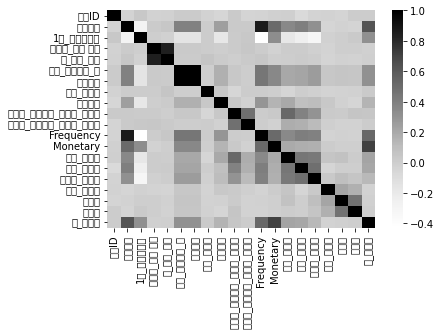

In [ ]:
sns.heatmap(df2_cor, annot =False, annot_kws = dict(color ='g'), cmap = "Greys")

In [ ]:
df3 = df2[[df2.columns[0], df2.columns[1], df2.columns[2],
           df2.columns[5], df2.columns[6], df2.columns[8],
           df2.columns[11], df2.columns[12], df2.columns[13],
           df2.columns[14], df2.columns[15], df2.columns[19]]]

In [ ]:
df3

,고객ID,방문빈도,1회_평균매출액,구매_카테고리_수,거주지역,거래기간,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,총_매출액
0,1,17,235711,6,6,1079,3,4,6,5,6,4007080
1,2,14,226314,4,4,537,3,3,2,5,4,3168400
2,3,18,148932,6,6,1080,3,2,4,6,7,2680780
3,4,17,349800,5,5,1019,3,5,3,5,5,5946600
4,5,73,188301,6,6,1086,6,7,5,6,6,13745950
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8,641886,6,6,1051,2,4,4,2,2,5135090
996,997,49,210524,6,6,1038,5,6,5,5,7,10315690
997,998,10,274129,4,4,1092,3,2,3,5,5,2741290
998,999,15,751266,5,5,1069,3,6,4,6,5,11268990


<Axes: >

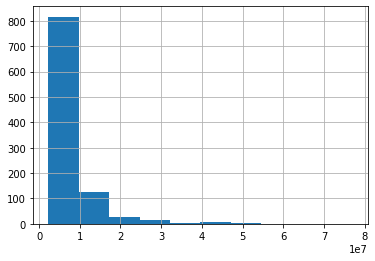

In [ ]:
df3[df3.columns[11]].hist()

<ipython-input-28-63b9a124170a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[df3.columns[11]] = np.log1p(df3[df3.columns[11]])
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from 

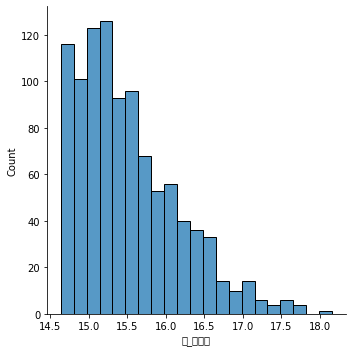

In [ ]:
df3[df3.columns[11]] = np.log1p(df3[df3.columns[11]])
sns.displot(df3[df3.columns[11]])

<ipython-input-29-44f35ffabb58>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[df3.columns[11]])


<Axes: xlabel='총_매출액', ylabel='Density'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from 

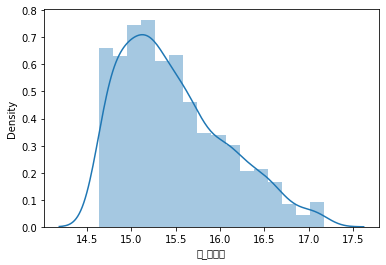

In [ ]:
q1 = df3[df3.columns[11]].quantile(q=0.25)
q3 = df3[df3.columns[11]].quantile(q=0.75)
IQR = q3-q1
data_IQR2 = df3[(df3[df3.columns[11]] < q3 + IQR * 1.5) & 
                (df3[df3.columns[11]] > q1 - IQR * 1.5)]
df3 = data_IQR2
sns.distplot(df3[df3.columns[11]])

In [ ]:
df3

,고객ID,방문빈도,1회_평균매출액,구매_카테고리_수,거주지역,거래기간,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,총_매출액
0,1,17,235711,6,6,1079,3,4,6,5,6,15.203574
1,2,14,226314,4,4,537,3,3,2,5,4,14.968738
2,3,18,148932,6,6,1080,3,2,4,6,7,14.801619
3,4,17,349800,5,5,1019,3,5,3,5,5,15.598330
4,5,73,188301,6,6,1086,6,7,5,6,6,16.436255
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8,641886,6,6,1051,2,4,4,2,2,15.451608
996,997,49,210524,6,6,1038,5,6,5,5,7,16.149177
997,998,10,274129,4,4,1092,3,2,3,5,5,14.823940
998,999,15,751266,5,5,1069,3,6,4,6,5,16.237565


In [ ]:
from pathlib import Path  
filepath = Path('C:/R_project/ubion/Ashopping/df3.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df3.to_csv(filepath)

In [ ]:
df3.to_csv(index=False)

'고객ID,방문빈도,1회_평균매출액,구매_카테고리_수,거주지역,거래기간,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,총_매출액\n1,17,235711,6,6,1079,3,4,6,5,6,15.203573604038375\n2,14,226314,4,4,537,3,3,2,5,4,14.968737602188927\n3,18,148932,6,6,1080,3,2,4,6,7,14.801618727943536\n4,17,349800,5,5,1019,3,5,3,5,5,15.59833035378616\n5,73,188301,6,6,1086,6,7,5,6,6,16.436254865983976\n6,26,127831,5,5,1089,4,3,7,7,7,15.016562400431706\n7,6,394890,6,6,874,2,1,5,2,3,14.678122415373993\n8,109,116672,6,6,1093,7,6,6,7,7,16.358469189833773\n9,17,405829,6,6,1027,3,5,4,3,6,15.746901671223954\n10,19,234792,5,5,986,3,4,6,6,7,15.31089270483257\n11,88,80455,5,5,1093,6,5,5,7,7,15.772791669033788\n12,39,153518,7,7,1074,5,5,4,4,6,15.605137922538386\n13,12,427850,4,4,1058,3,4,4,5,5,15.451434790406493\n14,15,273240,4,4,1075,3,4,4,4,5,15.226156253933716\n15,21,178795,3,3,1068,4,3,4,5,5,15.13851921284618\n16,27,346127,6,6,1039,4,6,5,4,7,16.050397048686364\n17,21,186376,5,5,1077,4,3,5,6,6,15.180045132801197\n18,56,144061,6,6,1068,5,6,5,7,7,15.903346889

In [ ]:
numeric_list = [df3.columns[1], df3.columns[2], df3.columns[5]]
categori_df3 = df3.drop(numeric_list, axis = 1)
categori_df3 = categori_df3.drop([df3.columns[11]], axis = 1)
categori_df3 = categori_df3.drop([df3.columns[0]], axis = 1)
cg_list = categori_df3
cg_list = list(cg_list)
X = df3[numeric_list + cg_list]
Y = df3[df3.columns[11]]

In [ ]:
categori_df3 

,구매_카테고리_수,거주지역,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도
0,6,6,3,4,6,5,6
1,4,4,3,3,2,5,4
2,6,6,3,2,4,6,7
3,5,5,3,5,3,5,5
4,6,6,6,7,5,6,6
...,...,...,...,...,...,...,...
995,6,6,2,4,4,2,2
996,6,6,5,6,5,5,7
997,4,4,3,2,3,5,5
998,5,5,3,6,4,6,5


In [ ]:
ct = ColumnTransformer([("scaling", StandardScaler(), numeric_list), 
                        ("onehot", OneHotEncoder(sparse = False), cg_list)])

In [ ]:
ct

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['방문빈도', '1회_평균매출액', '거래기간']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['구매_카테고리_수', '거주지역', 'Frequency', 'Monetary',
                                  '상품_만족도', '매장_만족도', '서비스_만족도'])])

In [ ]:
pd.DataFrame(X_train)

,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,거래기간,고객ID,이탈여부,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
105,14,278221,30,315600,1065,106,0,1,4,0,...,5,6,6,6,6,6,6,6,6,6
68,8,284696,21,348000,970,69,0,1,4,0,...,7,6,5,6,7,6,6,5,6,6
479,18,156243,11,296895,927,480,0,1,4,0,...,7,7,6,7,6,5,4,5,5,5
399,18,199402,18,340950,1072,400,0,1,4,0,...,6,5,5,5,4,4,5,6,5,5
434,21,397527,17,364895,617,435,1,1,4,0,...,7,6,7,6,7,4,5,7,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,25,150928,23,378650,1032,836,0,1,4,1,...,6,7,5,6,6,6,7,6,6,6
192,19,121057,25,357550,1052,193,0,2,2,1,...,7,7,6,7,6,4,5,7,5,4
629,15,246527,22,350050,1017,630,0,1,4,1,...,6,5,5,5,5,6,6,5,5,6
559,15,1132843,21,347750,980,560,0,2,3,0,...,6,7,7,7,7,7,7,6,6,6


In [ ]:
Y

0      15.203574
1      14.968738
2      14.801619
3      15.598330
4      16.436255
         ...    
995    15.451608
996    16.149177
997    14.823940
998    16.237565
999    14.973297
Name: 총_매출액, Length: 981, dtype: float64

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
ct.fit(X)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [ ]:
lr = LinearRegression().fit(X_train, Y_train) 
Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("[linear]")
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 
rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}". format(rmse)) 
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

predict value
 [14.63236581 15.03628447 15.11060585 16.83005956 16.20202287 15.07481541
 15.38857701 16.30247783 14.67270534 15.70949343 15.66136202 14.84807044
 15.06511452 15.40126627 15.10957119 15.08911517 15.64462097 14.81606729
 15.68814254 14.71576672 14.91903295 15.33402152 15.30596333 16.67871763
 16.12787271 15.34471378 16.68234607 15.05333872 15.69066686 15.35270318
 15.34969714 16.64367121 16.05881422 15.31563887 14.83360761 15.30506734
 15.69564482 15.40784208 16.66851115 15.07907474 14.83679957 15.72031695
 15.10455637 14.81605683 16.11708401 16.63437936 15.35369224 14.84582446
 14.8000021  15.02683278 14.86854904 14.92602842 15.32916451 16.72729606
 14.67593522 14.81020358 16.65597372 14.83933084 15.34914054 15.64879977
 15.03294889 15.3197943  16.08208248 16.09284531 16.71375975 16.74821761
 14.69144073 16.07944211 14.67464863 16.17583637 14.71161551 15.35533769
 15.6263338  15.05713467 15.05285071 15.05644847 16.08785589 15.66020856
 14.64616385 16.10007469 16.20847866

In [ ]:
df_columns = pd.DataFrame(df3.columns)

In [ ]:
df_columns

,0
0,고객ID
1,방문빈도
2,1회_평균매출액
3,구매_카테고리_수
4,거주지역
5,거래기간
6,Frequency
7,Monetary
8,상품_만족도
9,매장_만족도


In [ ]:
coefficient = np.round(lr.coef_,3)

In [ ]:
coefficient = pd.DataFrame(coefficient)

In [ ]:
coefficient

,0
0,0.019
1,0.072
2,0.004
3,0.006
4,-0.017
5,0.001
6,0.001
7,-0.003
8,0.000
9,0.011


In [ ]:
col_name = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/new project/col_name.csv", encoding = "cp949")
col_name

,Unnamed: 0,colnames.X_train.
0,1,방문빈도
1,2,1회_평균매출액
2,3,거래기간
3,4,구매_카테고리_수_1
4,5,구매_카테고리_수_2
5,6,구매_카테고리_수_3
6,7,구매_카테고리_수_4
7,8,구매_카테고리_수_5
8,9,구매_카테고리_수_6
9,10,구매_카테고리_수_7


In [ ]:
coefficient[1] = col_name["colnames.X_train."]

In [ ]:
coefficient

,0,1
0,0.019,방문빈도
1,0.072,1회_평균매출액
2,0.004,거래기간
3,0.006,구매_카테고리_수_1
4,-0.017,구매_카테고리_수_2
5,0.001,구매_카테고리_수_3
6,0.001,구매_카테고리_수_4
7,-0.003,구매_카테고리_수_5
8,0.000,구매_카테고리_수_6
9,0.011,구매_카테고리_수_7


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("[ridge]")
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr_ridge.score(X_test, Y_test))) 
print("RMSE : {:.3f}".format(rmse))
print("절편", np.round(lr_ridge.intercept_, 3))
print("가중치(beta)", np.round(lr_ridge.coef_, 3))
Y_value = [Y_pred, Y_test]

[ridge]
ridge R2 : 0.969
test R2 : 0.969
RMSE : 0.106
절편 15.454
가중치(beta) [ 5.100e-02  9.100e-02  5.000e-03  4.000e-03 -1.700e-02 -1.000e-03
  1.000e-03 -3.000e-03  3.000e-03  1.300e-02  4.000e-03 -1.700e-02
 -1.000e-03  1.000e-03 -3.000e-03  3.000e-03  1.300e-02 -2.040e-01
 -5.600e-02 -7.000e-03  2.300e-02  4.400e-02  9.200e-02  1.090e-01
 -7.000e-01 -5.710e-01 -3.580e-01 -1.050e-01  1.670e-01  5.520e-01
  1.014e+00 -6.300e-02  1.000e-03  0.000e+00  1.300e-02 -2.000e-03
  9.000e-03  4.100e-02 -2.100e-02 -4.500e-02  3.000e-02  2.600e-02
  1.900e-02  2.400e-02 -3.300e-02  4.200e-02  5.000e-03 -2.000e-02
 -1.600e-02 -1.000e-03 -1.200e-02  2.000e-03]


In [ ]:
coefficient2 = np.round(lr_ridge.coef_,3)
coefficient2 = pd.DataFrame(coefficient2)
coefficient2[1] = col_name["colnames.X_train."]
coefficient2

,0,1
0,0.051,방문빈도
1,0.091,1회_평균매출액
2,0.005,거래기간
3,0.004,구매_카테고리_수_1
4,-0.017,구매_카테고리_수_2
5,-0.001,구매_카테고리_수_3
6,0.001,구매_카테고리_수_4
7,-0.003,구매_카테고리_수_5
8,0.003,구매_카테고리_수_6
9,0.013,구매_카테고리_수_7


In [ ]:
coefficient2

array([ 5.100e-02,  9.100e-02,  5.000e-03,  4.000e-03, -1.700e-02,
       -1.000e-03,  1.000e-03, -3.000e-03,  3.000e-03,  1.300e-02,
        4.000e-03, -1.700e-02, -1.000e-03,  1.000e-03, -3.000e-03,
        3.000e-03,  1.300e-02, -2.040e-01, -5.600e-02, -7.000e-03,
        2.300e-02,  4.400e-02,  9.200e-02,  1.090e-01, -7.000e-01,
       -5.710e-01, -3.580e-01, -1.050e-01,  1.670e-01,  5.520e-01,
        1.014e+00, -6.300e-02,  1.000e-03,  0.000e+00,  1.300e-02,
       -2.000e-03,  9.000e-03,  4.100e-02, -2.100e-02, -4.500e-02,
        3.000e-02,  2.600e-02,  1.900e-02,  2.400e-02, -3.300e-02,
        4.200e-02,  5.000e-03, -2.000e-02, -1.600e-02, -1.000e-03,
       -1.200e-02,  2.000e-03])

In [ ]:
 lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
Y_pred = lr_lasso.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("[lasso]")
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr_lasso.score(X_test, Y_test))) 
print("RMSE : {:.3f}".format(rmse))
print("절편", np.round(lr_lasso.intercept_, 3))
print("가중치(beta)", np.round(lr_lasso.coef_, 3))
Y_value = [Y_pred, Y_test]

[lasso]
lasso R2 : 0.944
test R2 : 0.952
RMSE : 0.133
절편 15.393
가중치(beta) [ 0.124  0.101  0.008 -0.    -0.    -0.    -0.    -0.     0.     0.
 -0.    -0.    -0.    -0.    -0.     0.     0.    -0.    -0.    -0.
  0.     0.     0.    -0.    -0.471 -0.39  -0.211  0.     0.209  0.562
  0.951 -0.    -0.    -0.     0.    -0.     0.     0.    -0.    -0.
 -0.     0.     0.     0.    -0.     0.    -0.    -0.    -0.     0.
  0.     0.   ]


In [ ]:
coefficient3 = np.round(lr_lasso.coef_,3)
coefficient3 = pd.DataFrame(coefficient3)
coefficient3[1] = col_name["colnames.X_train."]
coefficient3

,0,1
0,0.124,방문빈도
1,0.101,1회_평균매출액
2,0.008,거래기간
3,-0.000,구매_카테고리_수_1
4,-0.000,구매_카테고리_수_2
5,-0.000,구매_카테고리_수_3
6,-0.000,구매_카테고리_수_4
7,-0.000,구매_카테고리_수_5
8,0.000,구매_카테고리_수_6
9,0.000,구매_카테고리_수_7


In [ ]:
 lr_ela = ElasticNet(alpha = 0.01).fit(X_train, Y_train)
Y_pred = lr_ela.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("[elastic]")
print("ela R2 : {:.3f}".format(lr_ela.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr_ela.score(X_test, Y_test))) 
print("RMSE : {:.3f}".format(rmse))
print("절편", np.round(lr_ela.intercept_, 3))
print("가중치(beta)", np.round(lr_ela.coef_, 3))
Y_value = [Y_pred, Y_test]

[elastic]
ela R2 : 0.950
test R2 : 0.957
RMSE : 0.125
절편 15.405
가중치(beta) [ 0.125  0.111  0.011 -0.    -0.    -0.    -0.    -0.     0.001  0.
 -0.    -0.    -0.    -0.    -0.     0.     0.    -0.045 -0.021  0.
  0.006  0.016  0.    -0.    -0.509 -0.419 -0.236 -0.     0.214  0.553
  0.925 -0.    -0.    -0.     0.    -0.     0.     0.    -0.    -0.
 -0.     0.     0.     0.    -0.     0.    -0.    -0.    -0.     0.
  0.     0.   ]


In [ ]:
coefficient4 = np.round(lr_ela.coef_,3)
coefficient4 = pd.DataFrame(coefficient4)
coefficient4[1] = col_name["colnames.X_train."]
coefficient4

,0,1
0,0.125,방문빈도
1,0.111,1회_평균매출액
2,0.011,거래기간
3,-0.000,구매_카테고리_수_1
4,-0.000,구매_카테고리_수_2
5,-0.000,구매_카테고리_수_3
6,-0.000,구매_카테고리_수_4
7,-0.000,구매_카테고리_수_5
8,0.001,구매_카테고리_수_6
9,0.000,구매_카테고리_수_7
